# Actividad 
 1. Abrir el dataset de cat.mat y usar la data de "names" y "CIJctx"
2. Generar el mapa de calor del DataFrame asociado
*  Las columnas y las filas deben tener los nombres de los canales 
3. Generar el histograma del dataset y determinar el porcentaje de valores 
4. Filtrar el Dataset con lo valores <=1, <=2, y <=3
 *  Con cada filtrado, que porcentajes de datos están eliminando 
5. Generar el mapa de calor de cada dataset filtrado
6. Generar el grafo 2d de cada dataset filtrado


In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.io

In [4]:
#Definimos la ruta del archivo.mat
file_path = r"C:\Users\ecere\Documents\GitHub\Neurociencias-2026-1\S03_datasets\BCT\cat.mat"
#abrir el contenido del archivo .mat
file_dict = scipy.io.loadmat(file_path)

In [5]:
file_dict

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Wed May 29 16:24:29 2013',
 '__version__': '1.0',
 '__globals__': [],
 'CIJall': array([[0, 3, 3, ..., 0, 0, 0],
        [3, 0, 3, ..., 0, 0, 0],
        [3, 3, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], shape=(95, 95), dtype=uint8),
 'CIJctx': array([[0, 3, 3, ..., 0, 0, 0],
        [3, 0, 3, ..., 0, 0, 0],
        [3, 3, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 3],
        [0, 0, 0, ..., 2, 0, 2],
        [0, 0, 0, ..., 2, 2, 0]], shape=(52, 52), dtype=uint8),
 'Names': array(['    17', '    18', '    19', '  PLLS', '  PMLS', '  AMLS',
        '  ALLS', '   VLS', '   DLS', '   21a', '   21b', '   20a',
        '   20b', '     7', '   AES', '    PS', '    AI', '   AII',
        '   AAF', '     P', '   VPc', '   EPp', '   Tem', '    3a',
        '    3b', '     1', '     2', '   SII', '   SIV', '    4g',
        ' 

In [6]:
matriz = file_dict['CIJctx']
columnas = file_dict['Names']
nombres = [str(n[0]) if isinstance(n, np.ndarray) else str(n) for n in columnas[0]]

In [7]:
matriz.shape, len(columnas)

((52, 52), 52)

In [8]:
gato_df = pd.DataFrame(data = matriz, columns = columnas, index= columnas)

In [9]:
gato_df.columns = [columna.split(sep = ' ')[0] for columna in gato_df.columns]
gato_df.index = gato_df.columns

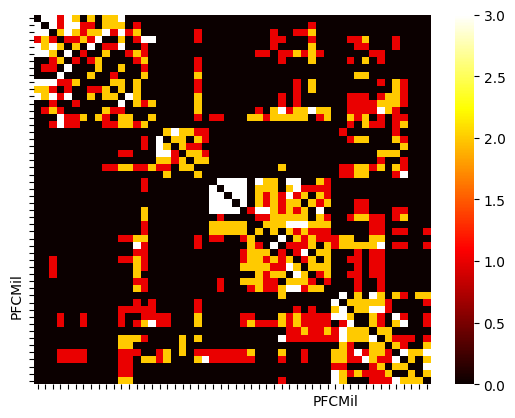

In [10]:
ax = sns.heatmap(gato_df, annot=False, fmt=".0f", cmap='hot',
                xticklabels=gato_df.columns, yticklabels=gato_df.columns)
plt.show()

In [11]:
valores = gato_df.values.flatten()
total = len(valores)

porc_1 = np.mean(valores <= 1) * 100
porc_2 = np.mean(valores <= 2) * 100
porc_3 = np.mean(valores <= 3) * 100

print(f"≤ 1 : {porc_1:.2f}% de los valores")
print(f"≤ 2 : {porc_2:.2f}% de los valores")
print(f"≤ 3 : {porc_3:.2f}% de los valores")


≤ 1 : 84.13% de los valores
≤ 2 : 95.93% de los valores
≤ 3 : 100.00% de los valores


Text(0, 0.5, 'Frecuencia')

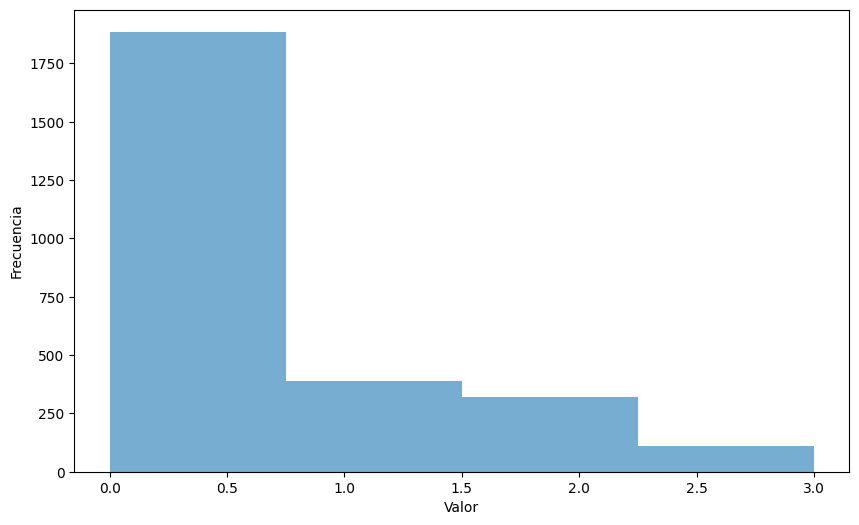

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(valores, bins=4, alpha=0.6)
plt.xlabel("Valor")
plt.ylabel("Frecuencia")

In [13]:
df = gato_df.copy()

# Filtrar valores ≤ 1
df_filtrado_1 = df.copy()
df_filtrado_1[df_filtrado_1 <= 1] = 0  # reemplaza por 0 o NaN si prefieres

# Mostrar el resultado
print("Filtrado ≤ 1:")
print(df_filtrado_1)


Filtrado ≤ 1:
                                      ...                              
        0  3  3  0  3  2  0  2  0  2  ...  0  0  0  0  0  0  0  0  0  0
        3  0  3  0  3  3  0  0  0  2  ...  0  0  0  0  0  0  0  0  0  0
        3  3  0  2  3  2  0  2  2  3  ...  0  0  0  0  0  0  0  0  0  0
        0  2  0  0  0  0  2  0  3  0  ...  0  2  0  0  0  0  0  0  0  0
        3  2  3  2  0  2  0  3  0  0  ...  0  0  0  0  0  0  0  0  0  0
        3  3  2  0  3  0  0  0  0  2  ...  0  0  0  0  0  0  0  0  0  0
        0  0  0  2  0  0  0  0  2  0  ...  0  2  0  0  0  0  0  0  0  0
        0  0  0  0  3  0  0  0  2  0  ...  0  0  0  0  0  0  0  0  0  0
        0  0  0  3  0  0  0  2  0  0  ...  2  2  0  0  0  0  0  0  0  0
        3  3  3  0  0  2  0  0  0  0  ...  0  0  0  0  0  2  0  0  0  0
        2  2  0  0  0  0  0  0  0  2  ...  0  0  0  0  0  2  0  0  0  0
        3  2  3  0  3  0  0  2  0  2  ...  0  0  0  0  2  2  0  0  0  0
        0  0  0  0  0  0  0  0  0  0  ...  0  0  0

In [14]:
porcentaje_eliminado_1 = (df <= 1).values.sum() / df.size * 100
print(f"Porcentaje de datos eliminados (≤1): {porcentaje_eliminado_1:.2f}%")


Porcentaje de datos eliminados (≤1): 84.13%


In [15]:
df_filtrado_2 = df.copy()
df_filtrado_2[df_filtrado_2 <= 2] = 0
porcentaje_eliminado_2 = (df <= 2).values.sum() / df.size * 100

df_filtrado_3 = df.copy()
df_filtrado_3[df_filtrado_3 <= 3] = 0
porcentaje_eliminado_3 = (df <= 3).values.sum() / df.size * 100

print(f"≤1: {porcentaje_eliminado_1:.2f}%  |  ≤2: {porcentaje_eliminado_2:.2f}%  |  ≤3: {porcentaje_eliminado_3:.2f}%")


≤1: 84.13%  |  ≤2: 95.93%  |  ≤3: 100.00%


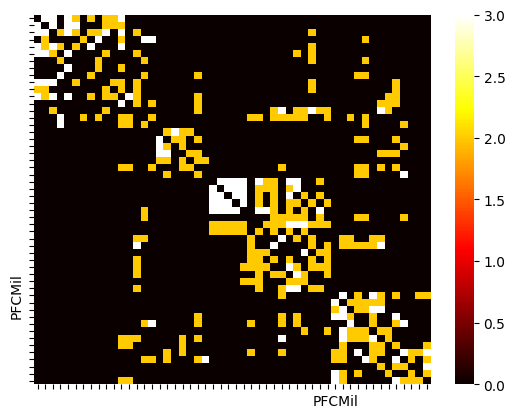

In [16]:
ax = sns.heatmap(df_filtrado_1, annot=False, fmt=".0f", cmap='hot',
                xticklabels=df_filtrado_1.columns, yticklabels=df_filtrado_1.columns)
plt.show()

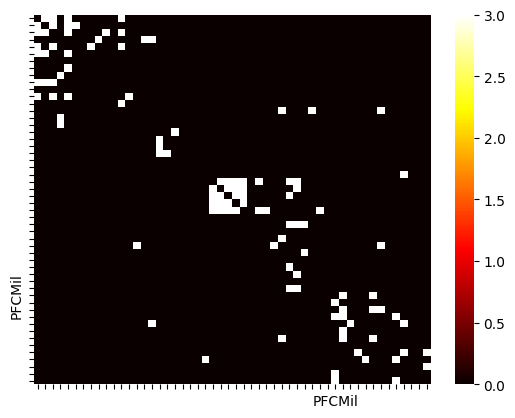

In [17]:
ax = sns.heatmap(df_filtrado_2, annot=False, fmt=".0f", cmap='hot',
                xticklabels=df_filtrado_2.columns, yticklabels=df_filtrado_2.columns)
plt.show()

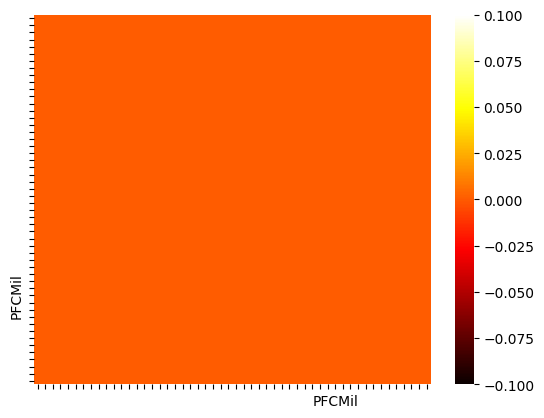

In [18]:
ax = sns.heatmap(df_filtrado_3, annot=False, fmt=".0f", cmap='hot',
                xticklabels=df_filtrado_3.columns, yticklabels=df_filtrado_3.columns)
plt.show()

In [26]:
    G = nx.from_numpy_array(porcentaje_eliminado_1.values, create_using=nx.DiGraph)
    G = nx.relabel_nodes(G, {i: porcentaje_eliminado_1.index[i] for i in range(len(porcentaje_eliminado_1))})
    plt.figure(figsize=(8,8))
    nx.draw(G, with_labels=True, node_size=300, font_size=8, arrows=True)
    plt.show()


AttributeError: 'numpy.float64' object has no attribute 'values'

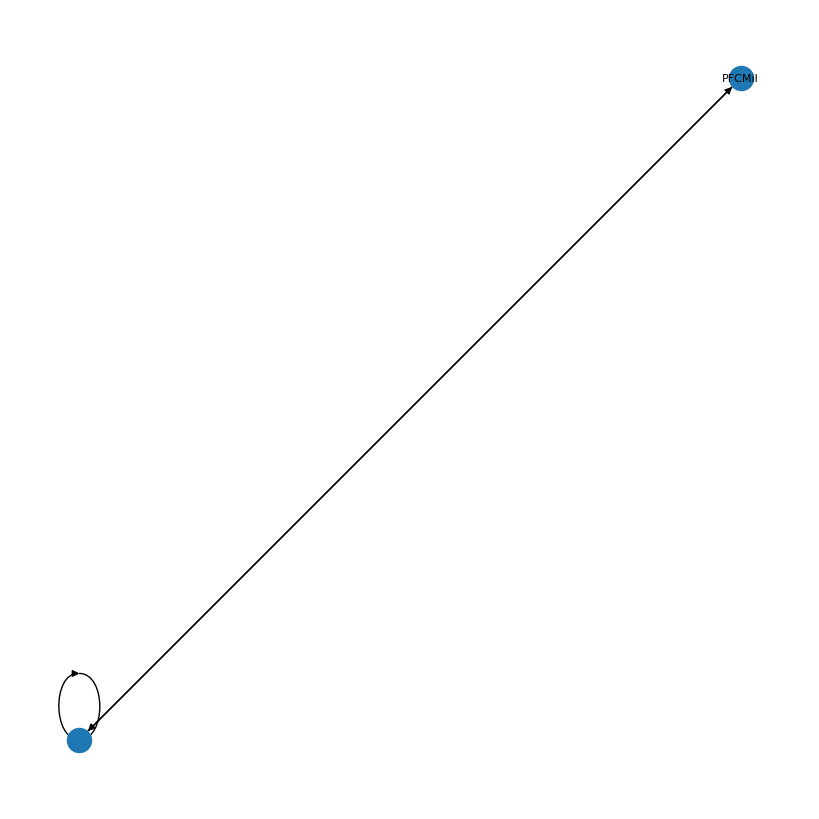

In [25]:
G2 = nx.from_numpy_array(df_filtrado_2.values, create_using=nx.DiGraph)
G2 = nx.relabel_nodes(G2, {i: df_filtrado_2.index[i] for i in range(len(df_filtrado_2))})
plt.figure(figsize=(8,8))
nx.draw(G2, with_labels=True, node_size=300, font_size=8, arrows=True)
plt.show()
